In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
net = cv2.dnn.readNetFromDarknet("YOLO/yolov3_custom.cfg", "YOLO/yolov3_custom_last.weights")

In [4]:
classes = ['powder_uncover', 'powder_uneven', 'scratch']

In [5]:
# my_img = cv2.imread('class_data/Val/scratch/image/Converted_ 0003.png')
my_img = cv2.imdecode(np.fromfile('class_data/Val/powder_uncover/image/converted_ 0126.png', dtype=np.uint8), cv2.IMREAD_COLOR)


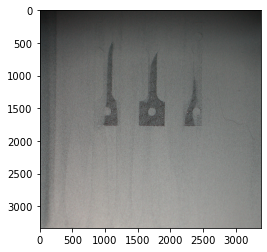

In [6]:
plt.imshow(my_img)
my_img = cv2.resize(my_img, (1024, 1024))

In [7]:
ht, wt, _ = my_img.shape

In [8]:
blob = cv2.dnn.blobFromImage(my_img, 1/255, (416, 416), (0,0,0), swapRB=True, crop=False)

In [9]:
blob.shape

(1, 3, 416, 416)

In [10]:
net.setInput(blob)

In [11]:
last_layer = net.getUnconnectedOutLayersNames()

In [12]:
layer_out = net.forward(last_layer)

In [13]:
layer_out[0][0]

array([4.4862665e-02, 5.0635662e-02, 5.6683946e-01, 9.1135092e-02,
       2.9579210e-06, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
      dtype=float32)

In [14]:
boxes = []
confidences = []
class_ids = []

for output in layer_out:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > .6:
            center_x = int(detection[0] * wt)
            center_y = int(detection[1] * ht)
            w = int(detection[2] * wt)
            h = int(detection[3] * ht)
            
            x = int(center_x - w/2)
            y = int(center_y - h/2)

            boxes.append([x,y,w,h])
            confidences.append((float(confidence)))
            class_ids.append(class_id)

In [15]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, .5, .5)
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(len(boxes), 3))

In [16]:
if len(indexes) > 0:
    for i in indexes.flatten():
        x,y,w,h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence = str(round(confidences[i], 2))
        color = colors[i]
        cv2.rectangle(my_img, (x, y), (x+w, y+h), color, 2)
        cv2.putText(my_img, label + " " + confidence, (x, y+20), font, 2, (0, 0, 0), 2)
cv2.imshow('img', my_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
